<a href="https://colab.research.google.com/github/wahyunh10/Project-Ecommerce-Shipping-Clasification-Modeling/blob/main/Stage_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

Import the csv file as panda DataFrames and examine it.

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.shape

(10999, 12)

**Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Observation
1. Data consists of 10999 rows
2. There is no data that is null or missing value
3. There doesn't seem to be a glaring issue with the data types for each column (it's appropriate)

In [ ]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3143,3144,F,Road,3,3,253,3,medium,M,7,5085,0
9552,9553,D,Ship,6,1,276,2,low,M,10,5108,0
4431,4432,B,Ship,4,2,257,3,medium,M,8,5045,1
10584,10585,D,Ship,5,5,187,3,medium,F,5,4613,0
10111,10112,F,Road,4,4,258,3,high,M,2,5420,0


**Exploratory Data Analysis**

In [ ]:
# grouping of columns by type
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [ ]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597,13.373216,210.196836,3634.016729,0.596691
std,1.141490,1.413603,1.522860,16.205527,48.063272,1635.377251,0.490584
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.500000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000,1.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000,1.000000


Some observations:

1. Coloumn `Customer_care_calls`, `customer_rating`, and `Prior_purchases` the distribution seems to be quite symmetrical (mean and median are not much different)
2. Coloumn `Discount_offered` and `Cost_of_the_Product`  seems to skew to the right (long-right tail)
3. Coloumn `Reached.on.Time_Y.N` boolean/binary value

In [ ]:
df[cats].describe()

,Mode_of_Shipment,Product_importance,Gender,Warehouse_block
count,10999,10999,10999,10999
unique,3,3,2,5
top,Ship,low,F,F
freq,7462,5297,5545,3666


some observations:

 * For the category of **female gender** is more dominant,
 * For the important product category is dominated by the **low category**
 * For the shipping mode category is dominated by **shipping by ship**
 * For warehouse_block is dominated by **block F**
 * All unique values for each category are still in the normal category, **around 2-5 unique values**

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



# **UNIVARIATE ANALYSIS**

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Box plots**

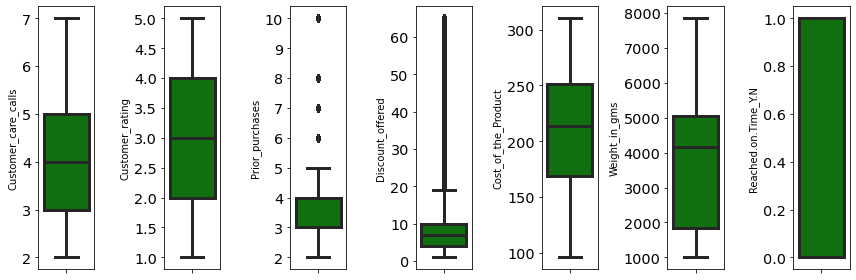

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

**Dist plots**

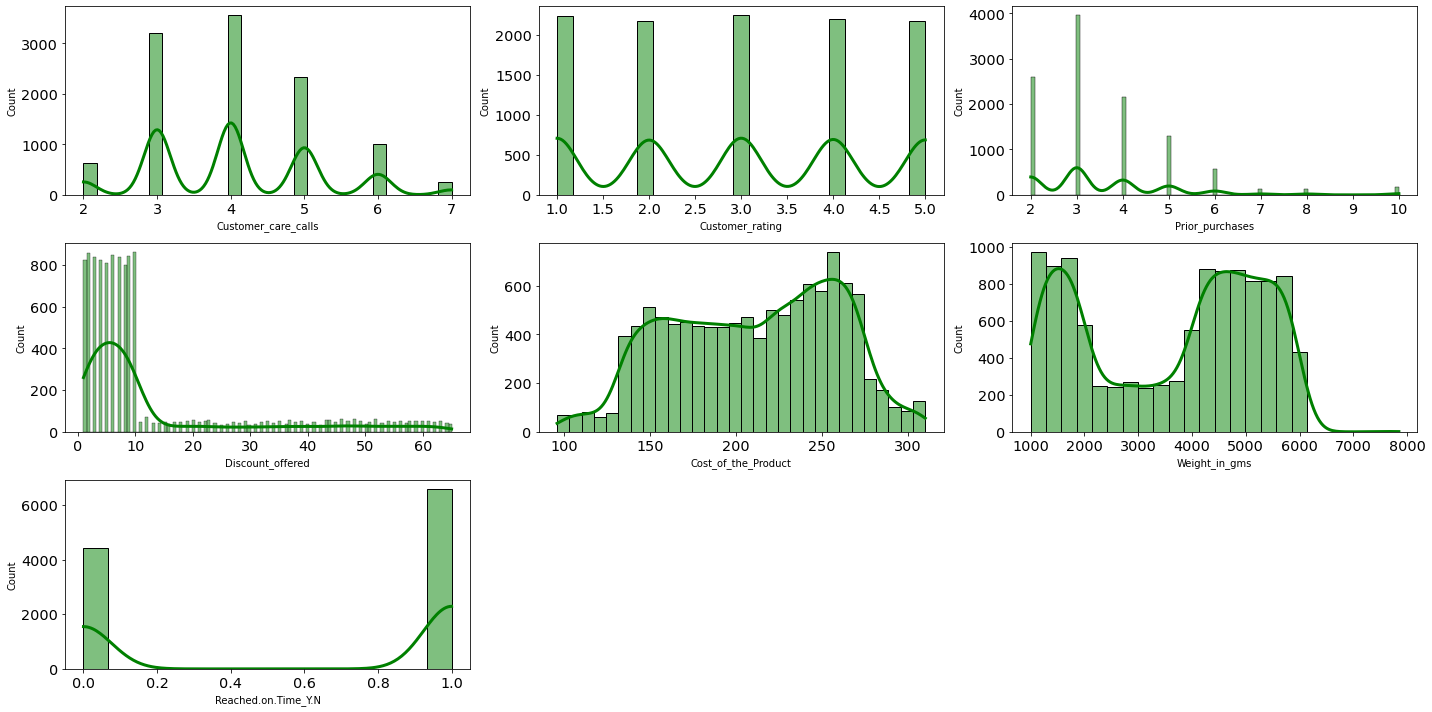

In [ ]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


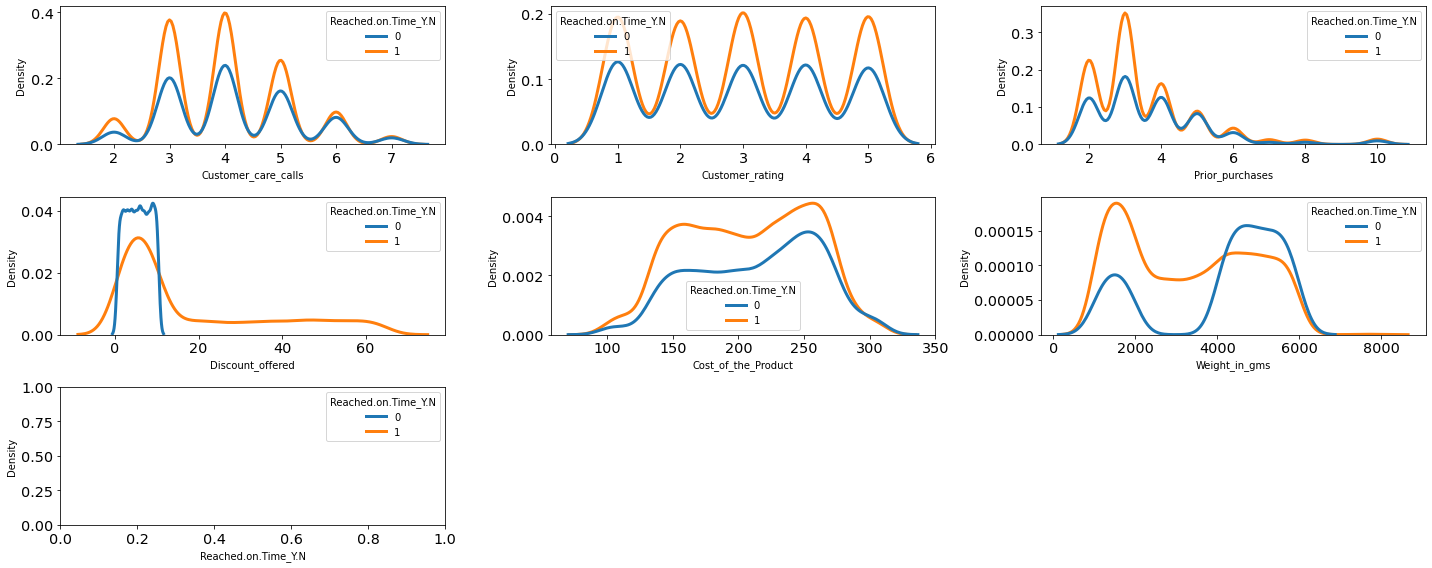

In [ ]:
features = nums
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(data=df, x=features[i], hue='Reached.on.Time_Y.N')
    #plt.xlabel(features[i])
    plt.tight_layout()

From the distribution plot it can be seen that:

* The `cost_of_the_product` column appears to be close to a normal distribution
* As we suspected when looking at the boxplot above, the `Prior_purchases`, and `Discount_offered` columns are slightly skewed. This means that there is a possibility that we will need to do something about these columns later.
* The `Reached.on.Time` columns are actually binary, so you don't need to pay too much attention to the shape of the distribution
* For the `weigh_in_gms` column there is an uncertainty of distribution because it is u-shape.
* For the column `customer_care_calls` and `customer_rating` evenly distributed

**Violin plots**

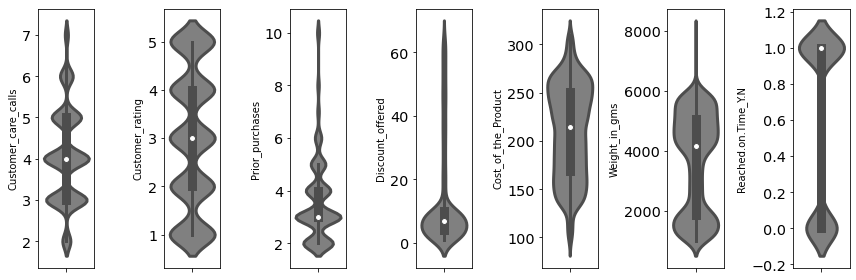

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**Count plot(categorical)**

In [ ]:
# categorical distribution
df_sample = df.sample(1000, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

As we observed earlier, the distribution of low category (Product_importance), warehouse_block and Ship category (Mode_of_Shipment) is dominated by 1-2 values.

# **Bivariate Analysis**
**Correlation heatmap**

In [ ]:
df.corr()

In [ ]:
corr_df = df.corr()

In [ ]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

From the correlation heatmap above, it can be seen that:


*   Our target `Reached.on.Time_Y.N` has a weak positive correlation with `customer_rating`, `cost_of_the_product`, `customer_care_calls` and `prior_purchases`
*   It also has a fairly strong positive correlation with `Discount_offered`
*   It also has a fairly strong negative correlation with `weight_in_gms`



**Pair plot**

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde');

From the pair plot above, we can also see something similar: `Reached.on.time_YN` tends to be higher for low `Discount_offered`

# **Category columns VS Target Variable**

In [ ]:
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data=df_sample, x=features[i], hue='Reached.on.Time_Y.N')
    #plt.xlabel(features[i])
    plt.tight_layout()

Observation

* shipment by ship tends to experience late delivery
* for `products_importance` with low and medium categories tend to experience late delivery
* for` warehouse_block` with category F tends to experience late delivery

**EDA Conclusion**

Some of the things we found from this EDA dataset are:

* The data looks valid and there are no major/significant defects
* There are some distributions that are slightly skewed, this must be remembered if we want to do something or use a model that requires the assumption of a normal distribution
* Some features have a clear correlation with the target, they will be used
* Some features look completely uncorrelated, they should be ignored
* From the categorical features, `mode_of_shipment` , `warehouse_block` and `product_importance` seem useful to be model predictors.